# EDA for the Shell AI 2023 Hackathon
Biomass Waste to Energy Optimization

Dataset description

The dataset contains the following:

`Biomass_History.csv`:  A time-series of biomass availability in the state of Gujarat from year 2010 to 2017. We have considered arable land as a map of 2418 equisized grid blocks (harvesting sites). For ease of use, we have flattened the map and provided location index, latitude, longitude, and year wise biomass availability for each harvesting site

`Distance_Matrix.csv`:  The travel distance from source grid block to destination grid block, provided as a 2418 x 2418 matrix. Note that this is not a symmetric matrix due to U-turns, one-ways etc. that may result into different distances for ‘to’ and ‘fro’ journey between source and destination.

`sample_submission.csv`: Contains sample format for submission
The columns provided in the dataset are as follows:

Column name

Description

year	 2018, 2019, 20182019
data_type	depot_location, refinery_location, biomass_forecast, biomass_demand_supply, pellet_demand_supply
source_index	Within 0 to 2417
destination_index	Within 0 to 2417
value	Any value following problem constraints


In [1]:
import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib.animation import FuncAnimation
rc('animation', html='jshtml')
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BIOMASS_DATA = "./dataset/Biomass_History.csv"
biomass_pd = pd.read_csv(BIOMASS_DATA, index_col="Index")

In [3]:
biomass_pd

Latitude  Longitude       2010       2011       2012       2013  \
Index                                                                    
0      24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1      24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...         ...        ...        ...        ...        ...        ...   
2413   20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

            2014       2015       2016        2017  
Index                                               
0      10.788374   6.647325   7.387925    5.180296  
1      34.419411  27.361908  40.431847   42.126945  
2      70.917908  42.517117  59.181629   73.203232  
3      93.513924  70.203171  74.536720  101.067352  
4      19.534035  19.165791  16.531315   26.086885  
...          ...        ...        ...         ...  
2413    5.113997   5.301668   6.419223    5.321604  
2414    0.121749   0.122467   0.145785    0.120626  
2415    0.039241   0.039473   0.046989    0.038879  
2416    1.316443   1.324201   1.576338    1.304297  
2417    0.229067   0.230417   0.274289    0.226953  

[2418 rows x 10 columns]

In [4]:
biomass_pd.describe()

Latitude    Longitude         2010         2011         2012  \
count  2418.000000  2418.000000  2418.000000  2418.000000  2418.000000   
mean     22.506537    71.826215   144.401424   150.860247   109.468899   
std       1.034936     1.389804   146.506351   142.264612   110.249714   
min      20.154560    68.624190     0.000167     0.000433     0.000290   
25%      21.685970    70.774060    23.449163    25.576084    22.711070   
50%      22.491970    71.888820   112.298855   126.291077    82.271317   
75%      23.297970    73.003570   207.689327   226.197079   163.512547   
max      24.668180    74.436820   883.691711   771.061646   871.800415   

              2013         2014         2015         2016         2017  
count  2418.000000  2418.000000  2418.000000  2418.000000  2418.000000  
mean    161.886430   157.954024   132.898633   113.089323   159.163367  
std     180.337708   139.870466   129.689111   102.092570   158.993069  
min       0.000532     0.000155     0.000072     0.000151     0.000191  
25%      27.044554    31.514698    22.732275    22.658495    26.064368  
50%     117.662296   136.859337   106.789989    91.721931   120.519817  
75%     222.835739   241.965115   196.102222   177.136295   231.067348  
max    1232.853760   871.800415   771.061646   514.148987   883.691711

In [5]:
biomass_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2418 entries, 0 to 2417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   2418 non-null   float64
 1   Longitude  2418 non-null   float64
 2   2010       2418 non-null   float64
 3   2011       2418 non-null   float64
 4   2012       2418 non-null   float64
 5   2013       2418 non-null   float64
 6   2014       2418 non-null   float64
 7   2015       2418 non-null   float64
 8   2016       2418 non-null   float64
 9   2017       2418 non-null   float64
dtypes: float64(10)
memory usage: 207.8 KB


In [6]:
biomass_pd.nunique()

Latitude       57
Longitude      74
2010         2418
2011         2418
2012         2418
2013         2418
2014         2418
2015         2418
2016         2418
2017         2418
dtype: int64

In [7]:
lat_long_pd = biomass_pd[['Latitude', 'Longitude']].copy()

In [8]:
lat_long_pd

Latitude  Longitude
Index                     
0      24.66818   71.33144
1      24.66818   71.41106
2      24.66818   71.49069
3      24.66818   71.57031
4      24.66818   71.64994
...         ...        ...
2413   20.15456   72.84432
2414   20.15456   72.92394
2415   20.15456   73.00357
2416   20.15456   73.08319
2417   20.15456   73.16282

[2418 rows x 2 columns]

In [9]:
biomass_per_year_pd = biomass_pd.iloc[:,2:].copy()

In [10]:
biomass_per_year_pd

2010       2011       2012       2013       2014       2015  \
Index                                                                     
0       8.475744   8.868568   9.202181   6.023070  10.788374   6.647325   
1      24.029778  28.551348  25.866415  21.634459  34.419411  27.361908   
2      44.831635  66.111168  56.982258  53.003735  70.917908  42.517117   
3      59.974419  80.821304  78.956543  63.160561  93.513924  70.203171   
4      14.653370  19.327524  21.928144  17.899586  19.534035  19.165791   
...          ...        ...        ...        ...        ...        ...   
2413    5.199882   4.516778   4.321080   2.658953   5.113997   5.301668   
2414    0.122287   0.126717   0.101494   0.111509   0.121749   0.122467   
2415    0.039415   0.040843   0.032713   0.035941   0.039241   0.039473   
2416    2.719220   1.370163   0.818687   1.205721   1.316443   1.324201   
2417    0.621228   0.238414   0.112909   0.209801   0.229067   0.230417   

            2016        2017  
Index                         
0       7.387925    5.180296  
1      40.431847   42.126945  
2      59.181629   73.203232  
3      74.536720  101.067352  
4      16.531315   26.086885  
...          ...         ...  
2413    6.419223    5.321604  
2414    0.145785    0.120626  
2415    0.046989    0.038879  
2416    1.576338    1.304297  
2417    0.274289    0.226953  

[2418 rows x 8 columns]

In [11]:
data_years = biomass_per_year_pd.columns

In [12]:
data_years

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [104]:
def create_animation(coordinates, biomass_data, year_range):
    if len(coordinates) > 0 and len(biomass_data) > 0:
        # Initialize the figure and axis
        fig, ax = plt.subplots(figsize=(15, 10))

        # Create the initial scatter plot with initial colors
        scatter = ax.scatter(coordinates.Latitude, coordinates.Longitude, c=biomass_data['2010'].values, cmap='jet',alpha=0.8)
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        plt.title("Biomass Density")
        # Update function for animation
        labels = []
        def update(frame):
            # Update the color of each point separately
            if len(labels)>0:
                labels.pop().remove()
            new_colors = biomass_data[frame].values
            scatter.set_array(new_colors)
            text = ax.text(20, 69, frame, fontsize=15, color='black')
            labels.append(text)
            return scatter,
    
        #print(year_range)
        return FuncAnimation(fig, update, frames=year_range, interval=1000)
    else:
        print("Biomass/Coordinate data is empty")

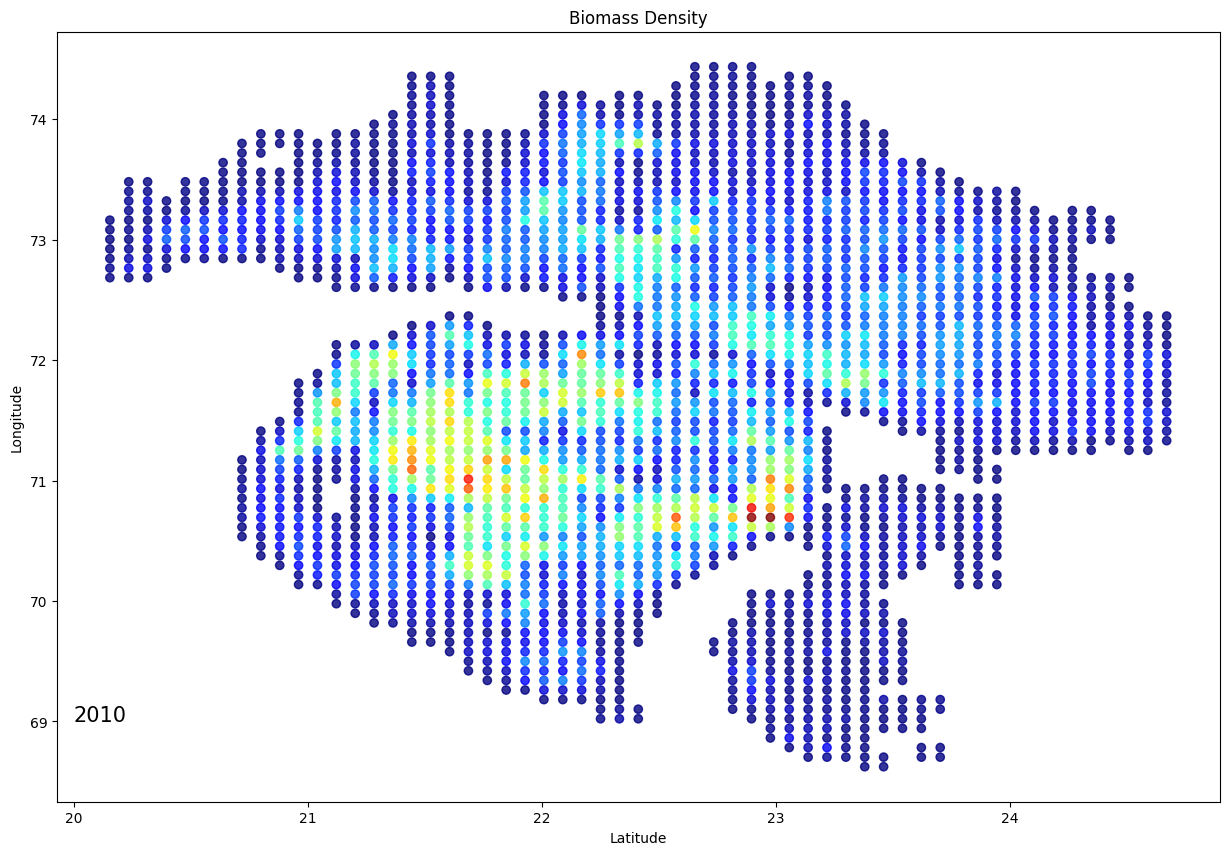

In [105]:
animation = create_animation(lat_long_pd, biomass_per_year_pd, data_years.values.tolist())

In [106]:
HTML(animation.to_jshtml())